In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Investigating Profile Views


- 1. Compare metrics across dimensions
    - Metrics
        - users : all user profiles
        - in_views : profiles viewed from internal sources
        - ex_views : profiles viewed from external sources
        - viewr : internal users who viewed another users profile
    - Dimensions
        - age
        - region
        
- 2. Total views
    - Rank of profiles by internal and external views
    - Percent of views that are external vs internal

## Data Prep

In [3]:
# Load data

df = pd.read_csv('./output/all_data.csv')

In [4]:
# Age grouping function

def age_group(row):
    if row['age'] >= 80:
        return "80+"
    if row['age'] >= 70:
        return "70-79"
    if row['age'] >= 60:
        return "60-69"
    if row['age'] >= 50:
        return "50-59"
    if row['age'] >= 40:
        return "40-49"
    if row['age'] >= 30:
        return "30-39"
    return "20-29"

In [5]:
# Create age_group column and users column for count of users

df['age_group'] = df.apply(age_group, axis=1)
df['users'] = 1

In [6]:
# Change null values to 0

df.fillna(0, inplace=True)
df.drop(df.age == 0)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 9 columns):
id           600000 non-null int64
age          600000 non-null int64
region       600000 non-null object
title        600000 non-null object
ex_views     600000 non-null float64
in_views     600000 non-null float64
viewer       600000 non-null float64
age_group    600000 non-null object
users        600000 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 41.2+ MB


## 1. Compare Metrics Across Dimensions

In [7]:
# Group data by age group

grouped = df.drop('age', axis=1).groupby(['age_group', 'region', 'title'])
df_data = grouped.aggregate({
    'ex_views' : sum,
    'in_views' : sum,
    'viewer' : sum,
    'users' : sum
})

In [8]:
# Create percent of total column for each metric

df_data['users_pct'] = round(df_data.users / df_data.users.sum(), 3)
df_data['in_views_pct'] = round(df_data.in_views / df_data.in_views.sum(), 3)
df_data['ex_views_pct'] = round(df_data.ex_views / df_data.ex_views.sum(), 3)
df_data['viewer_pct'] = round(df_data.viewer / df_data.viewer.sum(), 3)

In [9]:
# Arrange data so that it can be plotted
# Separate each metric then re-combine on axis=0 (vertically)

temp = df_data.loc[:, ['in_views', 'in_views_pct']]
temp['metric'] = 'in_views'
temp.rename(index=str, columns={'in_views' : 'count', 'in_views_pct' : 'percent'}, inplace=True)
df_data_plot = temp

temp = df_data.loc[:, ['ex_views', 'ex_views_pct']]
temp['metric'] = 'ex_views'
temp.rename(index=str, columns={'ex_views' : 'count', 'ex_views_pct' : 'percent'}, inplace=True)
df_data_plot = pd.concat([df_data_plot, temp], axis=0)

temp = df_data.loc[:, ['users', 'users_pct']]
temp['metric'] = 'users'
temp.rename(index=str, columns={'users' : 'count', 'users_pct' : 'percent'}, inplace=True)
df_data_plot = pd.concat([df_data_plot, temp], axis=0)

temp = df_data.loc[:, ['viewer', 'viewer_pct']]
temp['metric'] = 'viewer'
temp.rename(index=str, columns={'viewer' : 'count', 'viewer_pct' : 'percent'}, inplace=True)
df_data_plot = pd.concat([df_data_plot, temp], axis=0)

df_data_plot.reset_index(inplace=True)

#### Age Group

percent                              
metric    ex_views in_views  users viewer    All
age_group                                       
20-29        0.475    0.507  0.479  0.480  1.941
30-39        0.207    0.179  0.205  0.206  0.797
40-49        0.079    0.075  0.077  0.077  0.308
50-59        0.050    0.041  0.049  0.053  0.193
60-69        0.154    0.164  0.156  0.154  0.628
70-79        0.018    0.017  0.018  0.017  0.070
80+          0.010    0.005  0.009  0.008  0.032
All          0.993    0.988  0.993  0.995  3.969

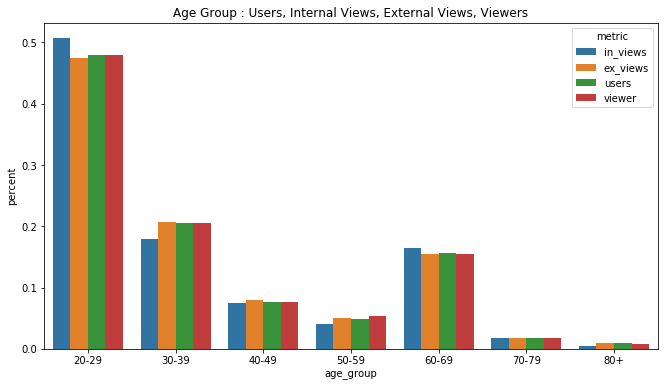

In [10]:
# Age Group plot

dims = (11, 6)
fig, ax = plt.subplots(figsize=dims)

df_age_group = df_data_plot.loc[:, ['percent', 'metric', 'age_group']]

sns.barplot(x="age_group", y='percent', hue='metric', data=df_age_group, estimator=sum, ci=None).set_title(
        "Age Group : Users, Internal Views, External Views, Viewers");

pd.pivot_table(df_age_group,index=["age_group"],values=["percent"],
               columns=["metric"],fill_value=0, margins=True, aggfunc=sum)

#### Region

percent                              
metric    ex_views in_views  users viewer    All
region                                          
Midwest      0.216    0.267  0.216  0.218  0.917
Northeast    0.249    0.255  0.249  0.247  1.000
Other        0.110    0.073  0.109  0.109  0.401
South        0.193    0.213  0.188  0.195  0.789
West         0.225    0.180  0.231  0.226  0.862
All          0.993    0.988  0.993  0.995  3.969

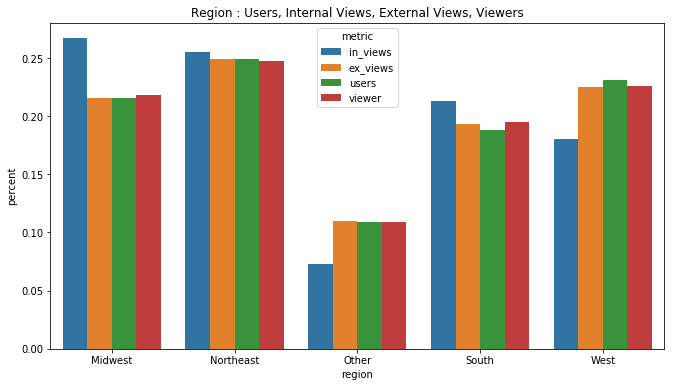

In [11]:
# Region plot

dims = (11, 6)
fig, ax = plt.subplots(figsize=dims)

df_region = df_data_plot.loc[:, ['percent', 'metric', 'region']]

sns.barplot(x="region", y='percent', hue='metric', data=df_region, estimator=sum, ci=None).set_title(
        "Region : Users, Internal Views, External Views, Viewers");

pd.pivot_table(df_region,index=["region"],values=["percent"],
               columns=["metric"],fill_value=0, margins=True, aggfunc=sum)

#### Title

percent                              
metric                 ex_views in_views  users viewer    All
title                                                        
Assistant professor       0.083    0.066  0.066  0.069  0.284
Full professor            0.044    0.397  0.029  0.027  0.497
Other                     0.111    0.064  0.117  0.123  0.415
Postdoctoral assistant    0.310    0.194  0.324  0.326  1.154
Student                   0.445    0.267  0.457  0.450  1.619
All                       0.993    0.988  0.993  0.995  3.969

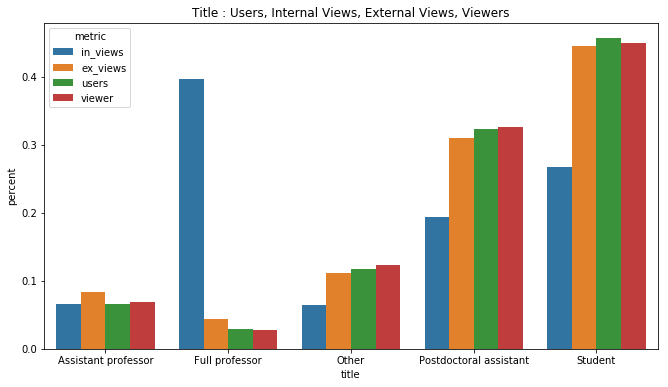

In [12]:
# Title plot

dims = (11, 6)
fig, ax = plt.subplots(figsize=dims)

df_title = df_data_plot.loc[:, ['percent', 'metric', 'title']]

sns.barplot(x='title', y='percent', hue='metric', data=df_title, estimator=sum, ci=None).set_title(
    "Title : Users, Internal Views, External Views, Viewers");

pd.pivot_table(df_title,index=["title"],values=["percent"],
               columns=["metric"],fill_value=0, margins=True, aggfunc=sum)

#### Viewed profile segmentation compared to population segmentation
- Region and Age do not have a large impact on which profiles people view, wheather coming from internal or external
- Full professors get more views per capita than any other title

## 2. Rank of profiles by views, internal and external

In [13]:
temp = df.loc[: , ['id', 'in_views', 'ex_views']].groupby('id')
df_rank = temp.aggregate(sum)

### Profile rank by internal views

In [14]:
# Internal views and external views per profile sorted by internal views

df_rank.sort_values(['in_views'], ascending=False).head(10)

,in_views,ex_views
id,,
1740253,406.0,0.0
2185215,383.0,2.0
2632343,180.0,0.0
1287442,88.0,0.0
3086119,88.0,0.0
2460133,82.0,0.0
979614,68.0,0.0
218859,67.0,1.0
314218,61.0,0.0


### Profile rank by external views

In [15]:
# Internal views and external views per profile sorted by external views

df_rank.sort_values(['ex_views'], ascending=False).head(10)

,in_views,ex_views
id,,
3172400,0.0,1124.0
2871984,0.0,1124.0
3197557,0.0,764.0
3766973,0.0,506.0
2960427,0.0,496.0
2619727,0.0,431.0
1933239,0.0,428.0
2644348,0.0,399.0
2297959,0.0,373.0


### View totals

In [23]:
# Internal view count vs external view count

internal_views = sum(df_rank['in_views'])
external_views = sum(df_rank['ex_views'])
view_total = internal_views + external_views

print('total count:\ninternal views = {}\nexternal views = {}'.format(
    int(internal_views), int(external_views)))
print()
print("percent of total views:\ninternal = {}%\nexternal = {}%".format(
    int((internal_views / view_total) * 100), int((external_views / view_total) * 100)))
print()
profiles = df.users.sum()
viewed_profiles = df[(df['in_views'] != 0) | (df['ex_views'] != 0)]
viewed_profiles_count = len(viewed_profiles)
print("Count of profiles : {}".format(profiles))
print("Count of viewed profiles (internal or external) : {}".format(viewed_profiles_count))
print("Percent of profiles viewed (internal or external : {}%)".format(int(viewed_profiles_count/profiles*100)))

total count:
internal views = 10806
external views = 975599

percent of total views:
internal = 1%
external = 98%

Count of profiles : 600000
Count of viewed profiles (internal or external) : 252192
Percent of profiles viewed (internal or external : 42%)


# Conclusion
### Understand how much web traffic user profiles are receiving and from where?
#### Examining internal/external views across 'age_group', 'region', and 'title' compared to population
    - Profiles are viewed proportionate to the distribution of all profiles
        - E.x.: ~50% of the user profiles are age group 20-29 simillarly ~50% of all internal profile views are age 20-29.  So this age group is performing as expected, not over or under.
        - This trend is generally true across age group and region for internal and external views
    - Profiles with the title 'professor' get more views than the average profile
    - Conclusion: Title affects how much a profile is viewed, but age and region do not.
   
#### Examining total views
    - 58% of profiles have not been viewed internally or externally (some might be inactive)
    - External views make up 98% of all views

    
#### Recommendation
    - Grow internal views : right now it is a very small percentage of total views, and increasing this will strengthen users' engagement and lenthen their lifetime on the platform
        - Market to professors becuse they drive more internal views
        - Implement new features such as friend recommendattions or gamification of platform engagement
        